<a href="https://colab.research.google.com/github/InfernoDragon0/NV_TSU_STEP/blob/main/NV_TSU_STEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Todo

# Mount GDrive and Prerequisites

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dependencies for STEP (imports)

In [ ]:
!pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:16:30tcmalloc: large alloc 1147494400 bytes == 0x3abb2000 @  0x7f4c2d9c6615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:14:22tcmalloc: large alloc 1434370048 bytes == 0x7f208000 @  0x7f4c2d9c6615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |█████

In [ ]:
!pip install ipyfilechooser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 30.0 MB/s 


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision
import numpy as np
from collections import OrderedDict
import time
from datetime import datetime
#from tensorboardX import SummaryWriter
import glob

In [ ]:
sys.path.append('/content/drive/MyDrive/colab3104/STEP')

Check if CUDA available

In [ ]:
torch.cuda.is_available()
torch.__version__

'1.10.1+cu111'

In [ ]:
%cd /content/drive/MyDrive/colab3104/STEP

/content/drive/MyDrive/colab3104/STEP


This is only needed one time, to setup the _C file for the VM

In [ ]:
!python setup.py build develop

/content/drive/MyDrive/colab3104/STEP
running build
running build_py
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:782: UserWarning: The detected CUDA version (11.2) has a minor version mismatch with the version that was used to compile PyTorch (11.1). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
building 'external.maskrcnn_benchmark.roi_layers._C' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_F

# dependencies for STEP

In [ ]:
from models import BaseNet, ROINet, TwoBranchNet, ContextNet
from external.maskrcnn_benchmark.roi_layers import nms
from utils.utils import inference, train_select, AverageMeter, get_gpu_memory
from utils.tube_utils import flatten_tubes, valid_tubes, compute_box_iou
from utils.vis_utils import overlay_image
from data.customize import CustomizedDataset, detection_collate, WIDTH, HEIGHT
from data.augmentations import BaseTransform

# Data Exploration (R2)

**R2. A *Data Exploration* section in the notebook that can load and display video data from the Toyota Smarthome (TSU) project (https://project.inria.fr/toyotasmarthome/).**

- [x] A data folder in the repo with subfolders that store input video files and other related input files for different types of datasets
- Choose a video file from the data folder through an appropriate UI component (e.g., dropdown menu) in a notebook code cell
See video playback of the chosen video file in an output cell

**Note that STEP requires chopping the entire video file into jpg frames, there is a helper that requires some modification to do this easily

In [ ]:
from ipyfilechooser import FileChooser

# choose file from your Google Drive
fcVideoPreview = FileChooser('/content/drive/MyDrive')
display(fcVideoPreview)

FileChooser(path='/content/drive/MyDrive', filename='', title='', show_hidden=False, select_desc='Select', cha…

Find a way to display a video using this Video thing

In [71]:
from IPython.display import Video

Video("/content/drive/MyDrive/colab3104/STEP/datasets/videos/test.mp4")


the below will just be so slow you can get seconds per frame (OpenCV2 Method)

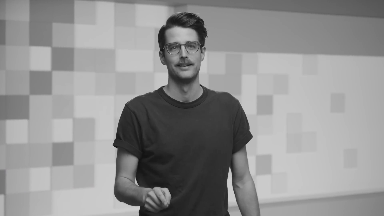

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import cv2

cap = cv2.VideoCapture(fcVideoPreview.selected)

if (cap.isOpened()== False):
    print("Error opening video stream or file")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
      
      clear_output(wait=True)
      cv2_imshow(frame)
      time.sleep(0.01)

Todo:



**R4. A *Training* section in the notebook that can train a HOI ML model based on the TSU project.**

- Choose a dataset subfolder, using appropriate UI elements, from the data folder to use for the training
Initialize a model (to be trained) with a network architecture configured in a separate .py file
- Specify a name for this new model using appropriate UI elements.
- Set the batch_size and epochs, with appropriate UI elements, prior to running a training sequence
- Run the training sequence, i.e., fit the model onto the dataset
- See some visual elements to indicate the progress of the training in the notebook
- After training is complete, the trained model should be added to the list of pre-trained models that can be chosen in R3
- You will likely need to dissect the train.py file https://github.com/dairui01/Toyota_Smarthome/blob/e92402a42be2521d885bdad471dc0b4fdfa400c3/pipline/train.py

**R5. A *Testing* section in the notebook that will evaluate a trained model based on the TSU project.**

- Choose a dataset subfolder, using appropriate UI elements, from the data folder to use for testing
- Load a pretrained model using an appropriate UI component
- Run the testing sequence, i.e., perform inference on each data sample and accumulate some statistics (again check out the train.py file)
- See some visual elements to indicate the progress of testing in the notebook
View some results (e.g., Average Precision per activity class and mean Average Precision) that allow for an assessment of how well the model performed
Save the results to a results folder in the repo

**R6. Configure the notebook using appropriate UI elements coupled with the right .py modules so that R2-5 can be performed based on another pipeline, e.g., the NVIDIA STEP pipeline (https://github.com/NVlabs/STEP) instead of the TSU pipeline.**

- Basically some way to toggle the dependencies needed for STEP instead of TSU
- STEP is just one other HOI project we suggest, but you are free to use any others. A good resource may be https://paperswithcode.com


# Inference (R3)

**R3. An *Inference* section in the notebook that can perform inference using a pretrained HOI ML model based on the TSU project.**

- [x] Load a pretrained model using an appropriate UI component
- Choose an input video, using an appropriate UI component, from the TSU project
- See inference results in the form of an output video with captions that indicate the current detected activity in each video frame

**NOTE: ffmpeg -framerate 30 -pattern_type glob -i '*.png' -c:v libx264 -pix_fmt yuv420p out.mp4 

^To merge the image frames gotten from STEP

Notes: /datasets/demo/frames the frames need to be in folders such as /datasets/demo/frames/video0 and frames should start at 00000.jpg, and have no remainder frames when selecting the FPS

## 1. Select the Pretrained Model

In [ ]:
from ipyfilechooser import FileChooser

# choose file from your Google Drive
fc = FileChooser('/content/drive/MyDrive')
display(fc)

FileChooser(path='/content/drive/MyDrive', filename='', title='', show_hidden=False, select_desc='Select', cha…

In [ ]:
print("data is")
print(fc.selected)

data is
/content/drive/MyDrive/colab3104/STEP/pretrained/ava_step.pth


In [ ]:
checkpoint_path = fc.selected #'pretrained/ava_step.pth'
if os.path.isfile(checkpoint_path):
    print ("Loading pretrain model from %s" % checkpoint_path)
    map_location = 'cuda:0'
    checkpoint = torch.load(checkpoint_path, map_location=map_location)
    args = checkpoint['cfg']
else:
    raise ValueError("Pretrain model not found!", checkpoint_path)

Loading pretrain model from /content/drive/MyDrive/colab3104/STEP/pretrained/ava_step.pth


## 2. Select a Video to do Inference

Note: After the video is inputted, need to chop the video into frames and store it somewhere (as it is not needed after the inference, probably in the local VM here, to save space in google drive)

Note 2: After chopping, run it through the below model, then we need to combine the images into a video using FFMPEG

Note 3: Show the video with the inferenced caption

In [ ]:
from ipyfilechooser import FileChooser

# choose file from your Google Drive
fcVideo = FileChooser('/content/drive/MyDrive')
display(fcVideo)

## 3. Load the Models and set data roots

In [ ]:
# then set data_root and save_root (for results)
# and set the settings based on file details

args.data_root = 'datasets/demo/frames/'
args.save_root = os.path.join(os.path.dirname(args.data_root), 'resultz/')
if not os.path.isdir(args.save_root):
    os.makedirs(args.save_root)

source_fps = 30
im_format = '0%04d.jpg' #such as 00000.jpg, 00001.jpg
conf_thresh = 0.4
global_thresh = 0.8    # used for cross-class NMS

In [ ]:
#Load the Model definitions

gpu_count = torch.cuda.device_count()
nets = OrderedDict()
# backbone network
nets['base_net'] = BaseNet(args)
# ROI pooling
nets['roi_net'] = ROINet(args.pool_mode, args.pool_size)

# detection network
for i in range(args.max_iter):
    if args.det_net == "two_branch":
        nets['det_net%d' % i] = TwoBranchNet(args)
    else:
        raise NotImplementedError
if not args.no_context:
    # context branch
    nets['context_net'] = ContextNet(args)

for key in nets:
    nets[key] = nets[key].cuda()

nets['base_net'] = torch.nn.DataParallel(nets['base_net'])
if not args.no_context:
    nets['context_net'] = torch.nn.DataParallel(nets['context_net'])
for i in range(args.max_iter):
    nets['det_net%d' % i].to('cuda:%d' % ((i+1)%gpu_count))
    nets['det_net%d' % i].set_device('cuda:%d' % ((i+1)%gpu_count))

# load pretrained model 
nets['base_net'].load_state_dict(checkpoint['base_net'])
if not args.no_context and 'context_net' in checkpoint:
    nets['context_net'].load_state_dict(checkpoint['context_net'])
for i in range(args.max_iter):
    pretrained_dict = checkpoint['det_net%d' % i]
    nets['det_net%d' % i].load_state_dict(pretrained_dict)

Building I3D model...
Building I3D head for global branch...
Building I3D head for global branch...
Building I3D head for global branch...
Building I3D head for context branch...


In [ ]:
################ DataLoader setup #################

dataset = CustomizedDataset(args.data_root, args.T, args.NUM_CHUNKS[args.max_iter], source_fps, args.fps, BaseTransform(args.image_size, args.means, args.stds,args.scale_norm), anchor_mode=args.anchor_mode, im_format=im_format)
dataloader = torch.utils.data.DataLoader(dataset, args.batch_size, num_workers=args.num_workers,
                              shuffle=False, collate_fn=detection_collate, pin_memory=True)

################ Inference #################

for _, net in nets.items():
    net.eval()

fout = open(os.path.join(args.save_root, 'results.txt'), 'w')
torch.cuda.synchronize()
t0 = time.time()
with torch.no_grad():
    for _, (images, tubes, infos) in enumerate(dataloader):

        _, _, channels, height, width = images.size()
        images = images.cuda()

        # get conv features
        conv_feat = nets['base_net'](images)
        context_feat = None
        if not args.no_context:
            context_feat = nets['context_net'](conv_feat)

        history, _ = inference(args, conv_feat, context_feat, nets, args.max_iter, tubes)

        # collect result of the last step
        pred_prob = history[-1]['pred_prob'].cpu()
        pred_prob = pred_prob[:,int(pred_prob.shape[1]/2)]
        pred_tubes = history[-1]['pred_loc'].cpu()
        pred_tubes = pred_tubes[:,int(pred_tubes.shape[1]/2)]
        tubes_nums = history[-1]['tubes_nums']

        # loop for each batch
        tubes_count = 0
        for b in range(len(tubes_nums)):
            info = infos[b]
            seq_start = tubes_count
            tubes_count = tubes_count + tubes_nums[b]

            cur_pred_prob = pred_prob[seq_start:seq_start+tubes_nums[b]]
            cur_pred_tubes = pred_tubes[seq_start:seq_start+tubes_nums[b]]

            # do NMS first
            all_scores = []
            all_boxes = []
            all_idx = []
            for cl_ind in range(args.num_classes):
                scores = cur_pred_prob[:, cl_ind].squeeze()
                c_mask = scores.gt(conf_thresh) # greater than a threshold
                scores = scores[c_mask]
                idx = np.where(c_mask.numpy())[0]
                if len(scores) == 0:
                    all_scores.append([])
                    all_boxes.append([])
                    continue
                boxes = cur_pred_tubes.clone()
                l_mask = c_mask.unsqueeze(1).expand_as(boxes)
                boxes = boxes[l_mask].view(-1, 4)

                boxes = valid_tubes(boxes.view(-1,1,4)).view(-1,4)
                keep = nms(boxes, scores, args.nms_thresh)
                boxes = boxes[keep].numpy()
                scores = scores[keep].numpy()
                idx = idx[keep]

                boxes[:, ::2] /= width
                boxes[:, 1::2] /= height
                all_scores.append(scores)
                all_boxes.append(boxes)
                all_idx.append(idx)

            # get the top scores
            scores_list = [(s,cl_ind,j) for cl_ind,scores in enumerate(all_scores) for j,s in enumerate(scores)]
            if args.evaluate_topk > 0:
                scores_list.sort(key=lambda x: x[0])
                scores_list = scores_list[::-1]
                scores_list = scores_list[:args.topk]
            
            # merge high overlapping boxes (a simple greedy method)
            merged_result = {}
            flag = [1 for _ in range(len(scores_list))]
            for i in range(len(scores_list)):
                if flag[i]:
                    s, cl_ind, j = scores_list[i]
                    box = all_boxes[cl_ind][j]
                    temp = ([box], [args.label_dict[cl_ind]], [s])

                    # find all high IoU boxes
                    for ii in range(i+1, len(scores_list)):
                        if flag[ii]:
                            s2, cl_ind2, j2 = scores_list[ii]
                            box2 = all_boxes[cl_ind2][j2]
                            if compute_box_iou(box, box2) > global_thresh:
                                flag[ii] = 0
                                temp[0].append(box2)
                                temp[1].append(args.label_dict[cl_ind2])
                                temp[2].append(s2)
                    
                    merged_box = np.mean(np.concatenate(temp[0], axis=0).reshape(-1,4), axis=0)
                    key = ','.join(merged_box.astype(str).tolist())
                    merged_result[key] = [(l, s) for l,s in zip(temp[1], temp[2])]

            # visualize results
            if not os.path.isdir(os.path.join(args.save_root, info['video_name'])):
                os.makedirs(os.path.join(args.save_root, info['video_name']))
            print("info is")
            print (info)
            overlay_image(os.path.join(args.data_root, info['video_name'], im_format % info['fid']),
                          os.path.join(args.save_root, info['video_name'], im_format % info['fid']),
                          pred_boxes = merged_result,
                          id2class = args.id2class)

            # write to files
            for key in merged_result:
                box = np.asarray(key.split(','), dtype=np.float32)
                for l, s in merged_result[key]:
                    fout.write('{0},{1:04},{2:.4},{3:.4},{4:.4},{5:.4},{6},{7:.4}\n'.format(
                                            info['video_name'],
                                            info['fid'],
                                            box[0],box[1],box[2],box[3],
                                            l, s))
        torch.cuda.synchronize()
        t1 = time.time()
        print ("Batch time: ", t1-t0)

        torch.cuda.synchronize()
        t0 = time.time()
                
fout.close()

Datalist len:  30
info is
{'video_name': 'videoid1', 'fid': 0}
info is
{'video_name': 'videoid1', 'fid': 1}
info is
{'video_name': 'videoid1', 'fid': 2}
info is
{'video_name': 'videoid1', 'fid': 3}
info is
{'video_name': 'videoid1', 'fid': 4}
info is
{'video_name': 'videoid1', 'fid': 5}
info is
{'video_name': 'videoid1', 'fid': 6}
info is
{'video_name': 'videoid1', 'fid': 7}
Batch time:  41.354470014572144
info is
{'video_name': 'videoid1', 'fid': 8}
info is
{'video_name': 'videoid1', 'fid': 9}
info is
{'video_name': 'videoid1', 'fid': 10}
info is
{'video_name': 'videoid1', 'fid': 11}
info is
{'video_name': 'videoid1', 'fid': 12}
info is
{'video_name': 'videoid1', 'fid': 13}
info is
{'video_name': 'videoid1', 'fid': 14}
info is
{'video_name': 'videoid1', 'fid': 15}
Batch time:  6.8838348388671875
info is
{'video_name': 'videoid1', 'fid': 16}
info is
{'video_name': 'videoid1', 'fid': 17}
info is
{'video_name': 'videoid1', 'fid': 18}
info is
{'video_name': 'videoid1', 'fid': 19}
info is
